In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [27]:
data = pd.read_csv("E:\diabetics prediction/diabetes2.csv")

In [28]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#randomforest

In [30]:
rf_classifier = RandomForestClassifier()
start_time = time.time()
rf_classifier.fit(X_train, y_train)
training_speed_rf = time.time() - start_time


In [31]:
start_time = time.time()
rf_predictions = rf_classifier.predict(X_test)
prediction_speed_rf = time.time() - start_time

In [32]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [33]:
#neuralnetwork

In [34]:
from sklearn.neural_network import MLPClassifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam')
start_time = time.time()
nn_classifier.fit(X_train, y_train)
training_speed_nn = time.time() - start_time

In [35]:
start_time = time.time()
nn_predictions = nn_classifier.predict(X_test)
prediction_speed_nn = time.time() - start_time

In [36]:
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)

In [ ]:
#svm

In [37]:
svm_classifier = SVC()
start_time = time.time()
svm_classifier.fit(X_train, y_train)
training_speed_svm = time.time() - start_time

In [38]:
start_time = time.time()
svm_predictions = svm_classifier.predict(X_test)
prediction_speed_svm = time.time() - start_time

In [39]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

In [40]:
# Gradient Boosting

In [41]:
gb_classifier = GradientBoostingClassifier()
start_time = time.time()
gb_classifier.fit(X_train, y_train)
training_speed_gb = time.time() - start_time

In [42]:
start_time = time.time()
gb_predictions = gb_classifier.predict(X_test)
prediction_speed_gb = time.time() - start_time

In [43]:
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

In [45]:
comparison_table = pd.DataFrame({
    'Technique': ['Random Forest', 'Neural Network', 'SVM', 'Gradient Boosting'],
    'Accuracy': [rf_accuracy, nn_accuracy, svm_accuracy, gb_accuracy],
    'Precision': [rf_precision, nn_precision, svm_precision, gb_precision],
    'Recall': [rf_recall, nn_recall, svm_recall, gb_recall],
    'F1 Score': [rf_f1, nn_f1, svm_f1, gb_f1],
    'Training Speed (s)': [training_speed_rf, training_speed_nn, training_speed_svm, training_speed_gb],
    'Prediction Speed (s)': [prediction_speed_rf, prediction_speed_nn, prediction_speed_svm, prediction_speed_gb]
})

In [46]:
print(comparison_table)

           Technique  Accuracy  Precision    Recall  F1 Score  \
0      Random Forest  0.759740   0.660714  0.672727  0.666667   
1     Neural Network  0.720779   0.642857  0.490909  0.556701   
2                SVM  0.766234   0.720930  0.563636  0.632653   
3  Gradient Boosting  0.746753   0.637931  0.672727  0.654867   

   Training Speed (s)  Prediction Speed (s)  
0            0.440041              0.035834  
1            0.476764              0.008916  
2            0.044265              0.023991  
3            0.380582              0.008163  


In [48]:
from tabulate import tabulate

In [49]:
table_str = tabulate(comparison_table, headers='keys', tablefmt='psql')
print(table_str)

+----+-------------------+------------+-------------+----------+------------+----------------------+------------------------+
|    | Technique         |   Accuracy |   Precision |   Recall |   F1 Score |   Training Speed (s) |   Prediction Speed (s) |
|----+-------------------+------------+-------------+----------+------------+----------------------+------------------------|
|  0 | Random Forest     |   0.75974  |    0.660714 | 0.672727 |   0.666667 |            0.440041  |             0.0358338  |
|  1 | Neural Network    |   0.720779 |    0.642857 | 0.490909 |   0.556701 |            0.476764  |             0.00891566 |
|  2 | SVM               |   0.766234 |    0.72093  | 0.563636 |   0.632653 |            0.0442646 |             0.0239911  |
|  3 | Gradient Boosting |   0.746753 |    0.637931 | 0.672727 |   0.654867 |            0.380582  |             0.00816345 |
+----+-------------------+------------+-------------+----------+------------+----------------------+------------------

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

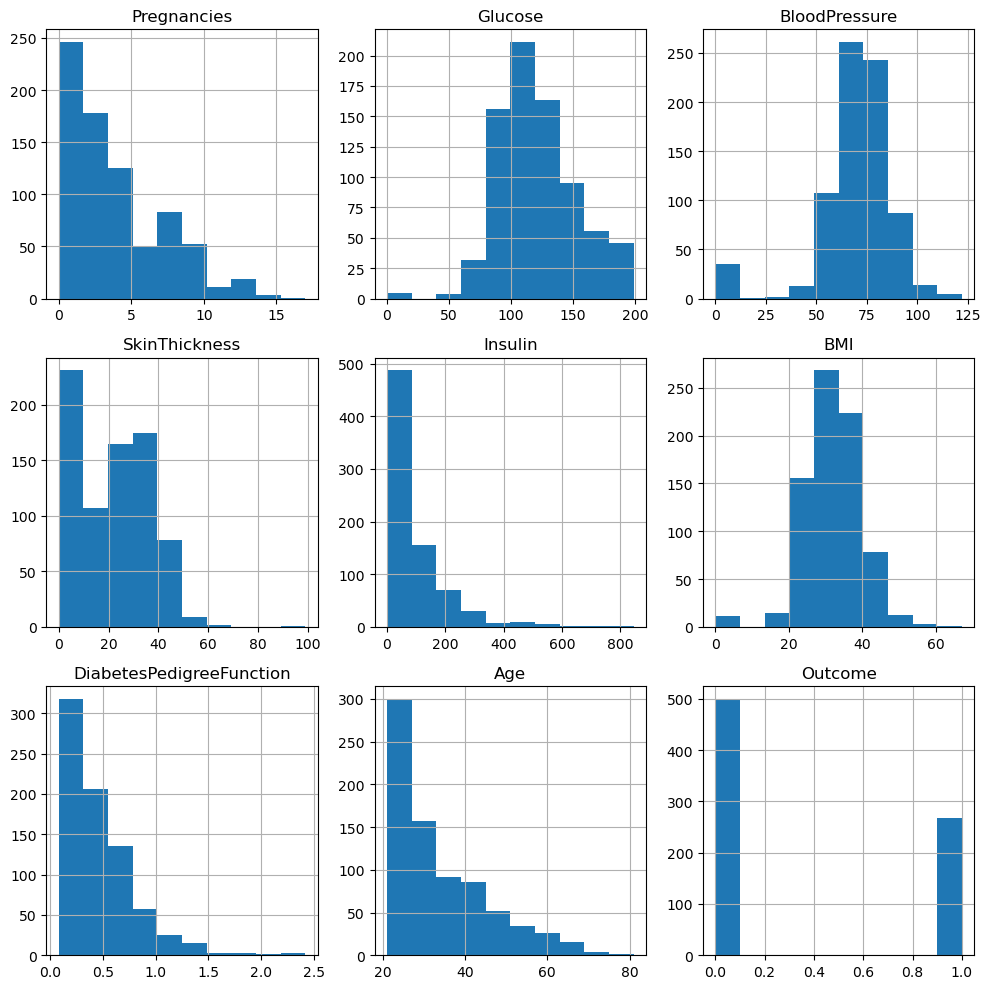

In [51]:
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

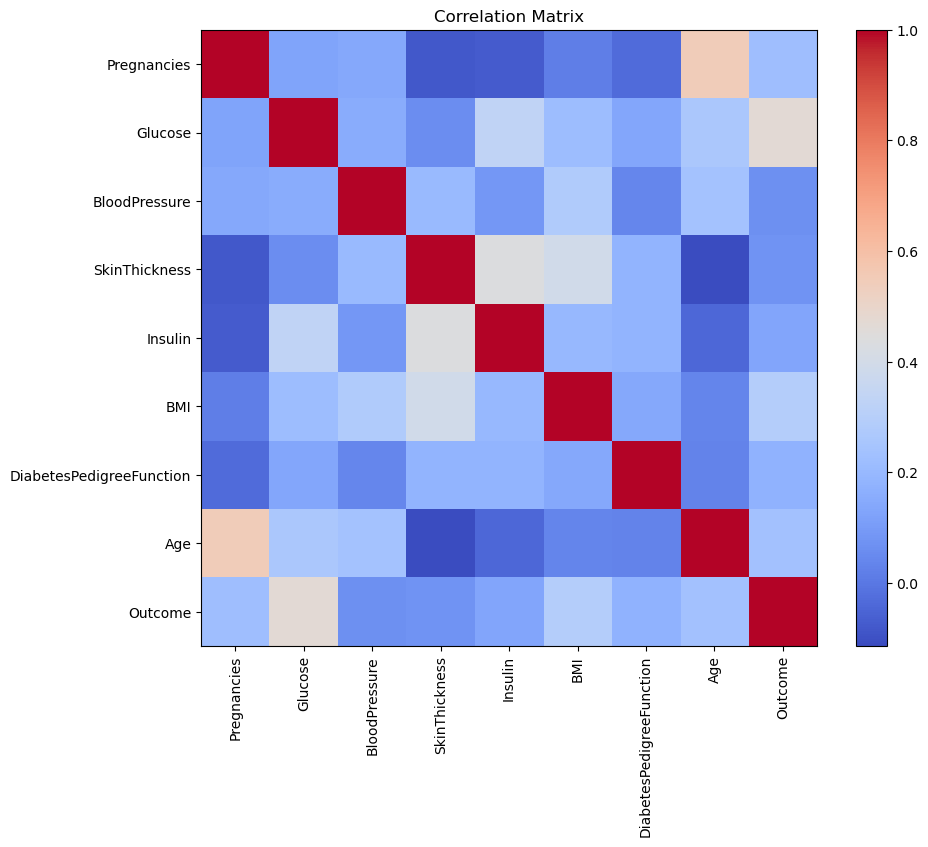

In [52]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

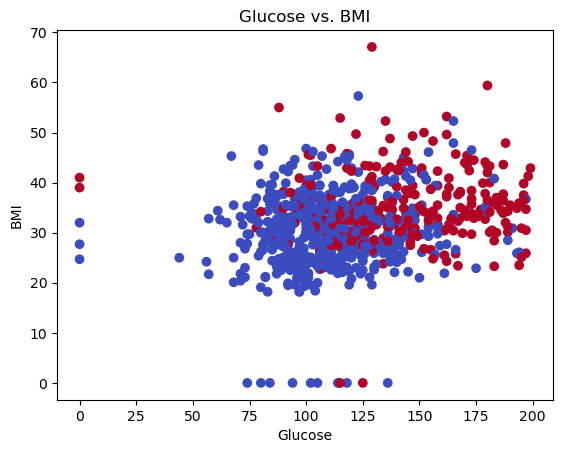

In [53]:
plt.scatter(data['Glucose'], data['BMI'], c=data['Outcome'], cmap='coolwarm')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs. BMI')
plt.show()